In [94]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# <font color="Blue">Frequency Stability of Portable THz Frequency Standard at 288GHz<font>

This document plots the data of portable THz frequency standard using difference-frequency generation of two acetylene-stabilized diode lasers at 1.5um. Measurement was implement on 11th July, 2022. 

In [95]:
import numpy as np
pi = np.pi
import sympy as sp
from sympy.abc import s
sp.init_printing()
import matplotlib.pyplot as plt
#import plotutils as plu
%matplotlib inline
#from unit import *
#import ltiutils as ltu
# import matplotlib.ticker as ptick

from scipy.optimize import curve_fit

import pandas as pd
import datetime

import matplotlib.image as mpimg

import statistics

## Experimental Setup

### Load data

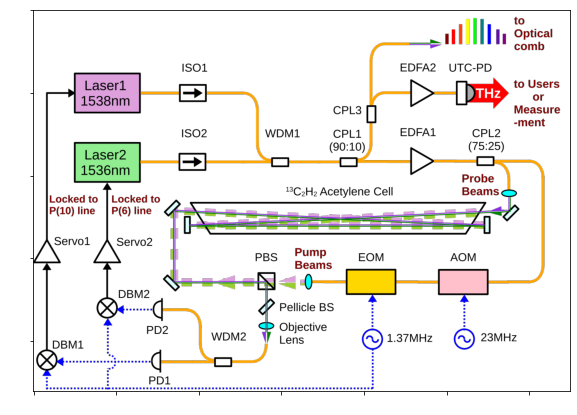

In [96]:
plt.figure(figsize=(10, 7.0))

# 画像を読込み配列変換し変数に格納
experimental_setup_portable_THz_std =  mpimg.imread("/home/shina/My_presentation/IRMMW_THz_2022_220321/material/Acetylene_stab_experimental_setup_220716.png")

# ｘ軸の目盛りの数字を消す
plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
plt.yticks(color="None")

# 画像の表示
plt.imshow(experimental_setup_portable_THz_std)

## Load Data

In [97]:
# Data of Allan deviaitons for freeruning and stabilized condition of portable THz standard
thz288G_freerun_01s_aln  = np.loadtxt('/home/shina/FOFC/220322/l0322_3_freerun.aln', comments='#')
thz288G_freerun_1s_aln   = np.loadtxt('/home/shina/FOFC/220322/l0322_2_freerun.aln', comments='#')
thz288G_locked_1s_aln      = np.loadtxt('/home/shina/FOFC/220711/l0711_2_abs_THz_288G_r.aln', comments='#')
thz288G_locked_01s_aln     = np.loadtxt('/home/shina/FOFC/220711/l0711_3_abs_THz_288G.aln', comments='#')

#ax=plt.plot(data, size=(10,12), font_scale=0.7)
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))

# RF beat sepctram
# 生データが２列の";"区切りであるにもかかわらず、各行最後に";"が付いていたため、string型として読み込もうとしてエラーがでた。
# そこで、usecols=(0,1) を使って、存在しない３列目を除外する形にしている。
#
r0322_1 = np.loadtxt('/home/shina/FOFC/220322/dat/r0322_1.DAT', delimiter=';', comments='#', skiprows=29, usecols=(0,1))
r0322_2 = np.loadtxt('/home/shina/FOFC/220322/dat/r0322_2.DAT', delimiter=';', comments='#', skiprows=29, usecols=(0,1))
r0322_3 = np.loadtxt('/home/shina/FOFC/220322/dat/r0322_3.DAT', delimiter=';', comments='#', skiprows=29, usecols=(0,1))

# Data of Allan deviaiton for freeruning and stabilized condition of Acetylene-stabilized lasers
# freerun
P10_1538nm_freerun_aln = np.loadtxt('/home/shina/FOFC/220318/l0318_2.aln', comments='#')
P6_1536nm_freerun_aln  = np.loadtxt('/home/shina/FOFC/220318/l0318_4.aln', comments='#')
#stabilized
P10_1538nm_locked_1s_aln = np.loadtxt('/home/shina/FOFC/220711/l0711_2_abs_P10_line_r.aln', comments='#')
P6_1536nm_locked_1s_aln  = np.loadtxt('/home/shina/FOFC/220711/l0711_2_abs_P6_line_r.aln', comments='#')

P10_1538nm_locked_01s_aln = np.loadtxt('/home/shina/FOFC/220711/l0711_3_abs_P10_line.aln', comments='#')
P6_1536nm_locked_01s_aln  = np.loadtxt('/home/shina/FOFC/220711/l0711_3_abs_P6_line.aln', comments='#')

#No correlation case of two laser frequency noise
no_correlation_case_summary_aln = np.loadtxt('/home/shina/FOFC/220711/no_correlation_case_l0711_summary1.aln', comments='#')

# Time series data of error signals of two lasers, which were acqiured by high-speed ADC
P6_1536nm_error_sig_ts  = np.loadtxt('/home/shina/FOFC/220428/l0428_4.txt', comments='#')
P10_1538nm_error_sig_ts = np.loadtxt('/home/shina/FOFC/220428/l0428_3.txt', comments='#')

# Data of RF beat signal
thz288G_locked_ts = np.loadtxt('/home/shina/FOFC/220711/l0711_2_abs_THz_288G_r_h.txt', comments='#')

# Frequency of RF synthesizer
fre_synthe = 11.99870*10**(9)

# VDI frequency multiplification factor
m_VDI = 12

# subharmonic mixer
n_SHM = 2

# Expected THz frequency calculated from P(6) - P(10) reported before. Appl.Phys.B {\bf 80}, 977 (2005)
nu_THz_cal = 288028084*10**3

## Allan Deviaitons of Acetylene-Stabilized Lasers

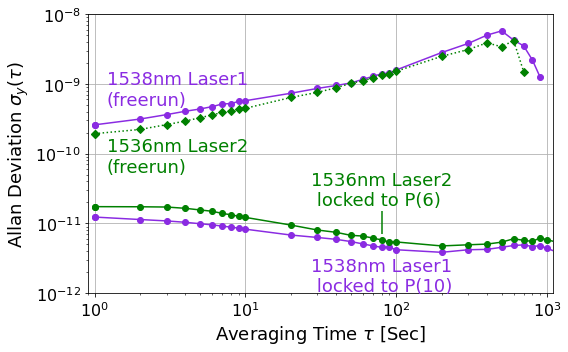

In [98]:
plt.figure(figsize=(8, 5.0))

# ログスケール表示
plt.xscale('log')
plt.yscale('log')

# plt.subplot(6, 2, 3)
plt.plot(P10_1538nm_locked_1s_aln[:,0], P10_1538nm_locked_1s_aln[:,1], 'o-', color='blueviolet', label='P10_1538nm_locked_1s_aln')
plt.plot(P10_1538nm_freerun_aln[:,0], P10_1538nm_freerun_aln[:,1], 'o-', color='blueviolet', label='P10_1538nm_freerun_aln')

plt.plot(P6_1536nm_locked_1s_aln[:,0], P6_1536nm_locked_1s_aln[:,1], 'go-', label='P6_1536nm_locked_1s_aln')
plt.plot(P6_1536nm_freerun_aln[0:26,0], P6_1536nm_freerun_aln[0:26,1], 'gD:', label='P6_1536nm_freerun_aln')
# 線をプロット
plt.vlines(80, 7.0e-12, 1.5e-11, colors='green', linestyle='solid', linewidth=1.5)
plt.grid()
plt.title('', fontsize=18)
# グラフのタイトル
plt.xlabel('Averaging Time $\\tau$ [Sec]', fontsize=18)
# X軸のラベル
# plt.xlabel('Time [sec]', fontsize=18)
# Y軸のラベル
plt.ylabel('Allan Deviation $\sigma_{y}(\\tau)$', fontsize=18)
#plt.legend()
# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# グラフ軸の範囲
plt.xlim([9e-1,1.1e3])
plt.ylim([1e-12,1e-8])
#igfont = {'family':'IPAGothic'}
#plt.text(0.157e9,-28,'RBW=500kHz',size=14, color='Black')
#plt.text(0.157e9,-32,'VBW=10kHz',size=14, color='Black')
#plt.text(0.21e9,-43,'Locked',size=14, color='Red')
#plt.text(0.205e9,-35,'Freerun',size=14, color='Blue')
#plt.text(0.185e9,-49,'Locked',size=14, color='Green')
#plt.text(0.185e9,-51,'(w/o max-hold)',size=14, color='Green')

#Axesに対してテキストを入れる
plt.text(27, 1.8e-11, '1536nm Laser2 \n locked to P(6)', color='green', fontsize=18)
plt.text(27, 1.05e-12, '1538nm Laser1 \n locked to P(10)', color='blueviolet', fontsize=18)

plt.text(1.2, 5e-10, '1538nm Laser1 \n(freerun)', color='blueviolet', fontsize=18)
plt.text(1.2, 5.5e-11, '1536nm Laser2 \n(freerun)', color='green', fontsize=18)

# グラフが重ならないように丁度良く調整
plt.tight_layout()

# save as png
# plt.savefig('P6_and_P10_laser_aln_summary.png')

# save as eps
# plt.savefig('P6_and_P10_laseraln_summary_r.eps')

## Error signals of 1538nm P(10) Laser1 and 1536nm P(6) laser2

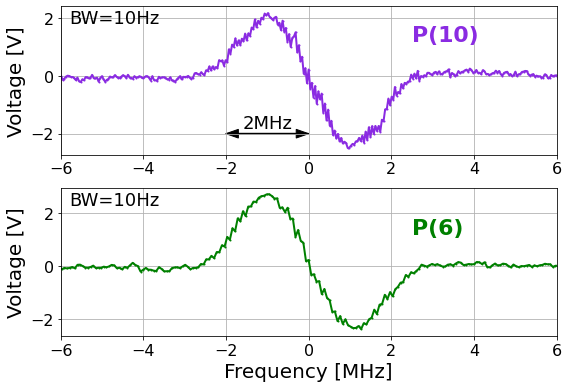

In [99]:
plt.figure(figsize=(8, 5.5))
# ---------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 1)

# conversion coefficeint = (sweped frequency)/(half period of triangular wave) = 39.4010MHz / 10sec
coefficient_dnu_P10_dt = (39.4010*10**6)/10

plt.plot((P10_1538nm_error_sig_ts[6300:6800,0]-65.35)*coefficient_dnu_P10_dt/(10**6), P10_1538nm_error_sig_ts[6300:6800,2], 'o-', markersize=1.0, color='blueviolet', linewidth = 2.0, label='P10_1538nm_error_sig_ts')
plt.grid()
# plt.title('', fontsize=18)
# X軸のラベル
# plt.xlabel('Time [sec]', fontsize=18)
# Y軸のラベル
plt.ylabel('Voltage [V]', fontsize=20)
#plt.legend()
# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# グラフ軸の範囲
plt.xlim([-6, 6])
# plt.ylim([0,50])

# Axesに対してテキストを入れる
plt.text(2.5, 1.2, 'P(10)', color='blueviolet', fontsize=22, fontweight='bold')
plt.text(-5.8, 1.8, 'BW=10Hz', color='black', fontsize=18)
plt.text(-1.6, -1.8, '2MHz', color='black', fontsize=18)

# 矢印
plt.arrow(x=-2, y=-2, dx=2, dy=0, width=0.02, head_width=0.3, head_length=0.3, length_includes_head=True, color='k')
plt.arrow(x=0, y=-2, dx=-2, dy=0, width=0.02, head_width=0.3, head_length=0.3, length_includes_head=True, color='k')

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# ｘ軸の目盛りの数字を消す
# plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
# plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.02, hspace=0.05)
# ---------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 2)

# conversion coefficeint = (sweped frequency)/(half period of triangular wave) = 63.560MHz / 10sec
coefficient_dnu_P6_dt = (63.560*10**6)/10

plt.plot((P6_1536nm_error_sig_ts[3400:3750,0]-35.8)*coefficient_dnu_P6_dt/(10**6), P6_1536nm_error_sig_ts[3400:3750,2], 'o-', markersize=1.0, color='green', linewidth = 2.0, label='P6_1536nm_error_sig_ts')
plt.grid()
# plt.title('', fontsize=18)
# X軸のラベル
plt.xlabel('Frequency [MHz]', fontsize=20)
# Y軸のラベル
plt.ylabel('Voltage [V]', fontsize=20)
#plt.legend()
# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# グラフ軸の範囲
plt.xlim([-6, 6])
# plt.ylim([0,50])

#Axesに対してテキストを入れる
plt.text(2.5, 1.2, 'P(6)', color='green', fontsize=22, fontweight='bold')
plt.text(-5.8, 2.3, 'BW=10Hz', color='black', fontsize=18)

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# ｘ軸の目盛りの数字を消す
# plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
# plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.02, hspace=0.02)
# ---------------------------------------------------------------------------------------------------
           
# グラフが重ならないように丁度良く調整
plt.tight_layout()

# save as png
# plt.savefig('P10_laser1_and_P6_laser2_error_signal_timeseries.png')
# save as eps
# plt.savefig('P10_laser1_and_P6_laser2_error_signal_timeseries.eps')

## History of Absolute Frequencies of P(6) and P(10) Transition of v1+v3 Band

### Load data

In [100]:
# NICT_acetylene_P6_transtion = np.loadtxt('/home/shina/FOFC/220715/NICT_Acetylene_13C2H2_P6_transition_220715_r.csv', comments='#')
# NICT_acetylene_P10_transtion = np.loadtxt('/home/shina/FOFC/220715/NICT_Acetylene_13C2H2_P10_transition_220715_r.csv', comments='#')

NICT_acetylene_P6_transtion = pd.read_csv('/home/shina/FOFC/220715/NICT_Acetylene_13C2H2_P6_transition_220715_datetime_r.csv', parse_dates=['datetime'])
NICT_acetylene_P10_transtion = pd.read_csv('/home/shina/FOFC/220715/NICT_Acetylene_13C2H2_P10_transition_220715_datetime_r.csv', parse_dates=['datetime'])

history_of_P6_transtion = np.loadtxt('/home/shina/FOFC/220715/Summary_comparison_Acetylene_13C2H2_P6_transition_220715_r.csv', comments='#')
history_of_P10_transtion = np.loadtxt('/home/shina/FOFC/220715/Summay_comparison_Acetylene_13C2H2_P10_transition_220715_r.csv', comments='#')

### Average of P6 and P10 transition frequencies

In [101]:
mean_NICT_acetylene_P6_transtion = statistics.mean(NICT_acetylene_P6_transtion['P6_frequency_kHz'] )
mean_NICT_acetylene_P10_transtion = statistics.mean(NICT_acetylene_P10_transtion['P10_frequency_kHz'] )

print(mean_NICT_acetylene_P6_transtion)
print(mean_NICT_acetylene_P10_transtion)

195109854521.6875
194821826413.95


### Recommended values of standard frequency by BIPM

In [102]:
BIPM_acetylene_P6_transition  = 195109854500
BIPM_acetylene_P10_transition = 194821826416

### History of NICT values of acetylene P(10) and P(6) transitions

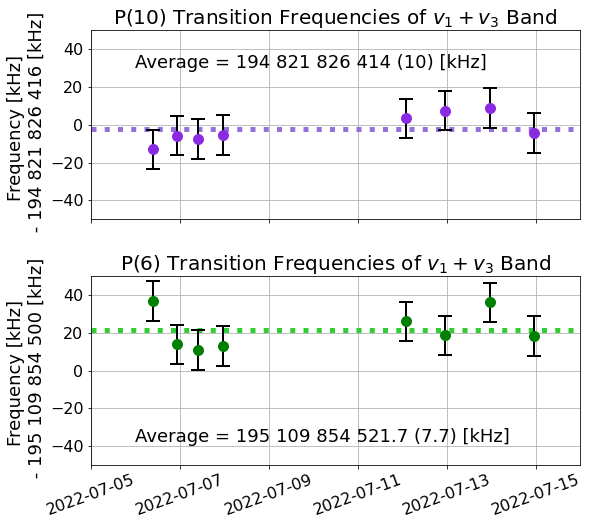

In [103]:
fig = plt.figure(figsize=(8, 8))

# ---------------------------------------------------------------------------------------------------
ax = fig.add_subplot(2, 1, 1)
plt.errorbar(NICT_acetylene_P10_transtion['datetime'], NICT_acetylene_P10_transtion['P10_frequency_kHz'] - BIPM_acetylene_P10_transition, yerr = NICT_acetylene_P10_transtion['P10_uncertainty_kHz'], \
         fmt='o', markersize=10, color='blueviolet', markeredgecolor = "blueviolet", ecolor='black', elinewidth=2, capsize=7, capthick=2, zorder=3)
#zorder=xは奥行z方向のプロットの順番で、プロットの重なりが問題になる場合に調整に使用する。
plt.grid()

# グラフのタイトル
plt.title("P(10) Transition Frequencies of $v_{1}+v_{3}$ Band", fontsize=20)
# X軸のラベル
# plt.xlabel('', fontsize=16)
# Y軸のラベル
plt.ylabel('Frequency [kHz] \n - 194 821 826 416 [kHz]', fontsize=18)
# レジェンド表示
# plt.legend(fontsize=12)

# plt.xticks(rotation=20)

#Axesに対してテキストを入れる
plt.text(datetime.date(2022, 7, 6), 30, 'Average = 194 821 826 414 (10) [kHz]', color='black', fontsize=18)

# 線をプロット
plt.hlines(mean_NICT_acetylene_P10_transtion - BIPM_acetylene_P10_transition, datetime.date(2022, 7, 5), datetime.date(2022, 7, 16), colors='mediumpurple', linestyle='dotted', linewidth=5, zorder=2)

#x軸の範囲
# plt.xlim([177.5,182.5])
ax.set_xlim([datetime.date(2022, 7, 5), datetime.date(2022, 7, 16)])
#y軸の範囲
plt.ylim([-50, 50])

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# ｘ軸の目盛りの数字を消す
plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
# plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.02, hspace=0.2)

# ---------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------
ax = fig.add_subplot(2, 1, 2)

plt.errorbar(NICT_acetylene_P6_transtion['datetime'], NICT_acetylene_P6_transtion['P6_frequency_kHz'] - BIPM_acetylene_P6_transition, yerr = NICT_acetylene_P6_transtion['P6_uncertainty_kHz'], \
         fmt='o', markersize=10, color='green', markeredgecolor = "green", ecolor='black', elinewidth=2, capsize=7, capthick=2, zorder=3)
#zorder=xは奥行z方向のプロットの順番で、プロットの重なりが問題になる場合に調整に使用する。
plt.grid()

# グラフのタイトル
plt.title("P(6) Transition Frequencies of $v_{1}+v_{3}$ Band", fontsize=20)
# X軸のラベル
plt.xlabel('', fontsize=16)
# Y軸のラベル
plt.ylabel('Frequency [kHz] \n - 195 109 854 500 [kHz]', fontsize=18)
# レジェンド表示
# plt.legend(fontsize=12)

plt.xticks(rotation=20)

#Axesに対してテキストを入れる
plt.text(datetime.date(2022, 7, 6), -38, 'Average = 195 109 854 521.7 (7.7) [kHz]', color='black', fontsize=18)

# 線をプロット
plt.hlines(mean_NICT_acetylene_P6_transtion - BIPM_acetylene_P6_transition, datetime.date(2022, 7, 5), datetime.date(2022, 7, 16), colors='limegreen', linestyle='dotted', linewidth=5, zorder=2)

#x軸の範囲
# plt.xlim([177.5,182.5])
ax.set_xlim([datetime.date(2022, 7, 5), datetime.date(2022, 7, 16)])
#y軸の範囲
plt.ylim([-50, 50])

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# ｘ軸の目盛りの数字を消す
# plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
# plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.02, hspace=0.3)

# ---------------------------------------------------------------------------------------------------

# グラフが重ならないように丁度良く調整
# plt.tight_layout()

# Matplotlibで出力する図の端が切れてしまうときは bbox_inches='tight'を使う。
# plt.tight_layout()だと今回のようにGridSpecを利用しているときにはグラフ間隔がリセットされてしまうので注意が必要。
# save as png
plt.savefig('history_of_P6_and_P10_abs_freq_220719.png', bbox_inches='tight')
# save as eps
# plt.savefig('history_of_P6_and_P10_abs_freq_220719.eps', bbox_inches='tight')

#plt.show()はいつも最後にしないと、プロットが出力されないなどの不具合が生じるので要注意
#plt.show() 

### Comparison of acetylene absolute frequencies measured by NMI worldwide

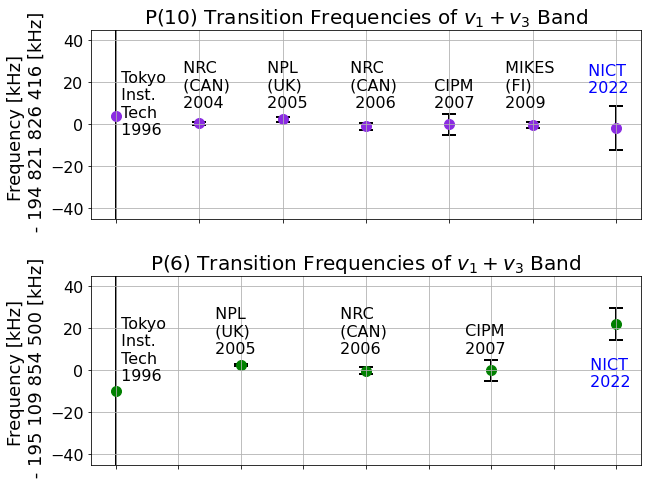

In [104]:
plt.figure(figsize=(9, 8))

# ---------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 1)
plt.errorbar(history_of_P10_transtion[:,0], history_of_P10_transtion[:,1]-history_of_P10_transtion[4,1], yerr = history_of_P10_transtion[:,2], \
         fmt='o', markersize=10, color='blueviolet', markeredgecolor = "blueviolet", ecolor='black', elinewidth=2, capsize=7, capthick=2, zorder=1)
#zorder=xは奥行z方向のプロットの順番で、プロットの重なりが問題になる場合に調整に使用する。
plt.grid()

# グラフのタイトル
plt.title("P(10) Transition Frequencies of $v_{1}+v_{3}$ Band", fontsize=20)
# X軸のラベル
plt.xlabel('', fontsize=16)
# Y軸のラベル
plt.ylabel('Frequency [kHz] \n - 194 821 826 416 [kHz]', fontsize=18)
# レジェンド表示
# plt.legend(fontsize=12)

#Axesに対してテキストを入れる
plt.text(1, -5, ' Tokyo\n Inst.\n Tech\n 1996', color='black', fontsize=16)
plt.text(1.75, 8, ' NRC\n (CAN)\n 2004', color='black', fontsize=16)
plt.text(2.75, 8, ' NPL\n (UK)\n 2005', color='black', fontsize=16)
plt.text(3.75, 8, ' NRC\n (CAN)\n  2006', color='black', fontsize=16)
plt.text(4.75, 8, ' CIPM\n 2007', color='black', fontsize=16)
plt.text(5.6, 8, ' MIKES\n (FI)\n 2009', color='black', fontsize=16)
plt.text(6.6, 15, ' NICT\n 2022', color='blue', fontsize=16)

#x軸の範囲
# plt.xlim([177.5,182.5])
#y軸の範囲
plt.ylim([-45, 45])

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# ｘ軸の目盛りの数字を消す
plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
# plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.02, hspace=0.2)

# ---------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 2)

plt.errorbar(history_of_P6_transtion[:,0], history_of_P6_transtion[:,1]-history_of_P6_transtion[3,1], yerr = history_of_P6_transtion[:,2], \
         fmt='o', markersize=10, color='green', markeredgecolor = "green", ecolor='black', elinewidth=2, capsize=7, capthick=2, zorder=1)
#zorder=xは奥行z方向のプロットの順番で、プロットの重なりが問題になる場合に調整に使用する。
plt.grid()

# グラフのタイトル
plt.title("P(6) Transition Frequencies of $v_{1}+v_{3}$ Band", fontsize=20)
# X軸のラベル
plt.xlabel('', fontsize=16)
# Y軸のラベル
plt.ylabel('Frequency [kHz] \n - 195 109 854 500 [kHz]', fontsize=18)
# レジェンド表示
# plt.legend(fontsize=12)

#Axesに対してテキストを入れる
plt.text(1, -5, ' Tokyo\n Inst.\n Tech\n 1996', color='black', fontsize=16)
plt.text(1.75, 8, ' NPL\n (UK)\n 2005', color='black', fontsize=16)
plt.text(2.75, 8, ' NRC\n (CAN)\n 2006', color='black', fontsize=16)
plt.text(3.75, 8, ' CIPM\n 2007', color='black', fontsize=16)
plt.text(4.75, -8, ' NICT\n 2022', color='blue', fontsize=16)

#x軸の範囲
# plt.xlim([177.5,182.5])
#y軸の範囲
plt.ylim([-45, 45])

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# ｘ軸の目盛りの数字を消す
plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
# plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.02, hspace=0.3)

# ---------------------------------------------------------------------------------------------------

# グラフが重ならないように丁度良く調整
# plt.tight_layout()

# Matplotlibで出力する図の端が切れてしまうときは bbox_inches='tight'を使う。
# plt.tight_layout()だと今回のようにGridSpecを利用しているときにはグラフ間隔がリセットされてしまうので注意が必要。
# save as png
# plt.savefig('comparison_sumamry_of_P6_and_P10_abs_freq_220719.png', bbox_inches='tight')
# save as eps
# plt.savefig('history_of_P6_and_P10_abs_freq_220719.eps', bbox_inches='tight')

#plt.show()はいつも最後にしないと、プロットが出力されないなどの不具合が生じるので要注意
#plt.show() 

## Absolute Frequency of 0.3THz Standard

### Typical frequency fluctuation of 0.3THz standard

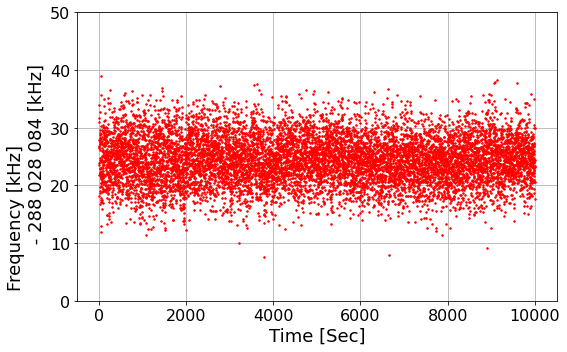

In [105]:
plt.figure(figsize=(8, 5.0))

# ログスケール表示
# plt.xscale('log')
# plt.yscale('log')

# plt.subplot(6, 2, 3)
plt.plot(thz288G_locked_ts[36000:46000,0]-40000, (thz288G_locked_ts[40000:50000,1]-nu_THz_cal)/1000, 'o', markersize=1.5, color='red', label='thz288G_locked_ts')
plt.grid()
plt.title('', fontsize=18)
# グラフのタイトル
plt.xlabel('Time [Sec]', fontsize=18)
# X軸のラベル
# plt.xlabel('Time [sec]', fontsize=18)
# Y軸のラベル
plt.ylabel('Frequency [kHz]                     \n - 288 028 084 [kHz]', fontsize=18)
#plt.legend()
# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# グラフ軸の範囲
# plt.xlim([9e-2,1.1e3])
plt.ylim([0,50])
#igfont = {'family':'IPAGothic'}
#plt.text(0.157e9,-28,'RBW=500kHz',size=14, color='Black')
#plt.text(0.157e9,-32,'VBW=10kHz',size=14, color='Black')
#plt.text(0.21e9,-43,'Locked',size=14, color='Red')
#plt.text(0.205e9,-35,'Freerun',size=14, color='Blue')
#plt.text(0.185e9,-49,'Locked',size=14, color='Green')
#plt.text(0.185e9,-51,'(w/o max-hold)',size=14, color='Green')

#Axesに対してテキストを入れる
# plt.text(12, 5e-8, 'Stabilized', color='red', fontsize=22)
# plt.text(12, 1.3e-6, 'Freerun', color='blue', fontsize=22)

# グラフが重ならないように丁度良く調整
plt.tight_layout()

# save as png
# plt.savefig('thz288G_stab_timeseries.png')
# save as eps
# plt.savefig('thz288G_stab_timeseries.eps')

### Reproducebility of 0.3THz standard

#### Load data

In [106]:
thz288G_abs_freq = pd.read_csv('/home/shina/FOFC/220715/thz288G_abs_freq_summary_220715_datetime_r.csv', parse_dates=['date'])

#### Average frequency of 0.3THz standard

In [107]:
mean_NICT_thz288G_abs_freq = statistics.mean(thz288G_abs_freq['thz288G_abs_kHz'])

print(mean_NICT_thz288G_abs_freq)

288028108.3607143


#### Plot of reproducebility of 0.3THz standard

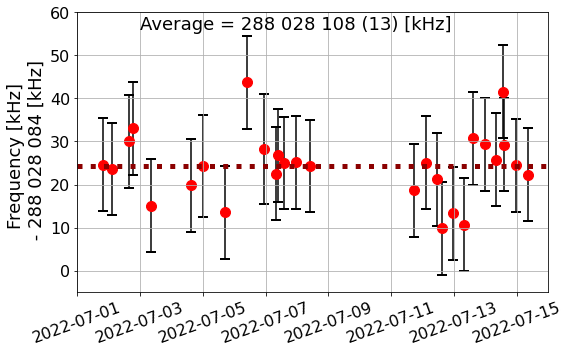

In [108]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.errorbar(thz288G_abs_freq['date'], thz288G_abs_freq['thz288G_abs_kHz'] - 288028084, yerr = thz288G_abs_freq['error_kHz_+'], \
         fmt='o', markersize=10, color='red', markeredgecolor = "red", ecolor='black', elinewidth=1.5, capsize=5, capthick=2, zorder=1)
plt.grid()
# グラフのタイトル
# plt.title("P(6) Transition Frequencies of $v_{1}+v_{3}$ Band", fontsize=20)
# X軸のラベル
plt.xlabel('', fontsize=16)
# Y軸のラベル
plt.ylabel('Frequency [kHz] \n - 288 028 084 [kHz]', fontsize=18)

plt.xticks(rotation=20)

#x軸の範囲
# plt.xlim([2022,07,01,2022-7-15])
ax.set_xlim([datetime.date(2022, 7, 1), datetime.date(2022, 7, 16)])
#y軸の範囲
plt.ylim([-5, 60])

#Axesに対してテキストを入れる
plt.text(datetime.date(2022, 7, 3), 56, 'Average = 288 028 108 (13) [kHz]', color='black', fontsize=18)

# 線をプロット
plt.hlines(mean_NICT_thz288G_abs_freq - 288028084, datetime.date(2022, 7, 1), datetime.date(2022, 7, 16), colors='darkred', linestyle='dotted', linewidth=5, zorder=2)

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# ｘ軸の目盛りの数字を消す
# plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
# plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.02, hspace=0.2)

# グラフが重ならないように丁度良く調整
plt.tight_layout()

# save as png
plt.savefig('thz288G_reproducebility.png')
# save as eps
# plt.savefig('thz288G_reproducebility.eps')

### Allan Deviaiton of 0.3THz Standard

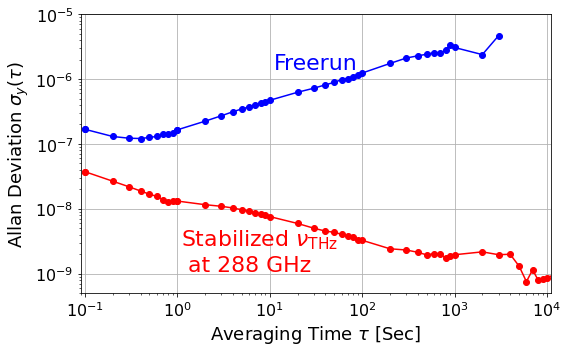

In [110]:
plt.figure(figsize=(8, 5))

# ログスケール表示
plt.xscale('log')
plt.yscale('log')

# plt.subplot(6, 2, 3)
plt.plot(thz288G_freerun_01s_aln[0:10,0],thz288G_freerun_01s_aln[0:10,1], 'bo-', label='thz288G_freerun_01s_aln')
plt.plot(thz288G_freerun_1s_aln[0:31,0],thz288G_freerun_1s_aln[0:31,1], 'bo-', label='thz288G_freerun_1s_aln')

plt.plot(thz288G_locked_01s_aln[0:10,0],thz288G_locked_01s_aln[0:10,1], 'ro-', label='thz288G_locked_01s_aln')
plt.plot(thz288G_locked_1s_aln[:,0],thz288G_locked_1s_aln[:,1], 'ro-', label='thz288G_locked_1s_aln')

plt.grid()
plt.title('', fontsize=18)
# グラフのタイトル
plt.xlabel('Averaging Time $\\tau$ [Sec]', fontsize=18)
# X軸のラベル
# plt.xlabel('Time [sec]', fontsize=18)
# Y軸のラベル
plt.ylabel('Allan Deviation $\sigma_{y}(\\tau)$', fontsize=18)
#plt.legend()
# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# グラフ軸の範囲
plt.xlim([9e-2,1.1e4])
plt.ylim([5e-10,1e-5])
#igfont = {'family':'IPAGothic'}
#plt.text(0.157e9,-28,'RBW=500kHz',size=14, color='Black')
#plt.text(0.157e9,-32,'VBW=10kHz',size=14, color='Black')
#plt.text(0.21e9,-43,'Locked',size=14, color='Red')
#plt.text(0.205e9,-35,'Freerun',size=14, color='Blue')
#plt.text(0.185e9,-49,'Locked',size=14, color='Green')
#plt.text(0.185e9,-51,'(w/o max-hold)',size=14, color='Green')

#Axesに対してテキストを入れる
plt.text(1.1, 1.1e-9, 'Stabilized $\\nu_{\\rm THz}$ \n at 288 GHz', color='red', fontsize=22)
plt.text(11, 1.4e-6, 'Freerun', color='blue', fontsize=22)

# グラフが重ならないように丁度良く調整
plt.tight_layout()

# save as png
plt.savefig('thz288G_aln_summary1.png')

# save as eps
# plt.savefig('thz288G_aln_summary1..eps')

## Effect of CMRR in 0.3THz Standard

### Plot1

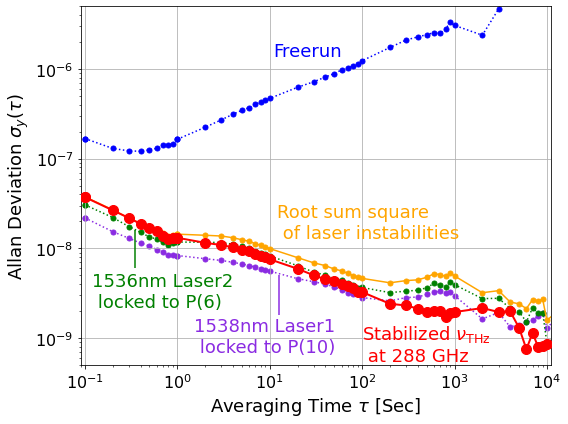

In [112]:
plt.figure(figsize=(8, 6.0))

# ログスケール表示
plt.xscale('log')
plt.yscale('log')

# plt.subplot(6, 2, 3)
plt.plot(thz288G_locked_01s_aln[0:10,0],thz288G_locked_01s_aln[0:10,1], 'o-', markersize=10, color='red',linewidth = 2.0, label='thz288G_locked_01s_aln', zorder=3)
plt.plot(thz288G_locked_1s_aln[:,0],thz288G_locked_1s_aln[:,1], 'o-', markersize=10, color='red', linewidth = 2.0, label='thz288G_locked_1s_aln', zorder=3)

plt.plot(P10_1538nm_locked_01s_aln[0:10,0], P10_1538nm_locked_01s_aln[0:10,1]*(194821.8/288), 'o:',  markersize=5, color='blueviolet', linewidth = 1.5, label='P10_1538nm_locked_01s_aln', zorder=1)
plt.plot(P10_1538nm_locked_1s_aln[:,0], P10_1538nm_locked_1s_aln[:,1]*(194821.8/288), 'o:',  markersize=5, color='blueviolet', linewidth = 1.5, label='P10_1538nm_locked_1s_aln', zorder=1)

plt.plot(P6_1536nm_locked_01s_aln[0:10,0], P6_1536nm_locked_01s_aln[0:10,1]*(195109.9/288), 'o:', markersize=5, color = "green", linewidth = 1.5, label='P6_1536nm_locked_01s_aln', zorder=1)
plt.plot(P6_1536nm_locked_1s_aln[:,0], P6_1536nm_locked_1s_aln[:,1]*(195109.9/288), 'o:', markersize=5, color = "green", linewidth = 1.5, label='P6_1536nm_locked_1s_aln', zorder=1)

plt.plot(no_correlation_case_summary_aln[:,0], no_correlation_case_summary_aln[:,1], 'o-', markersize=5, color='orange',linewidth = 1.5, label='no_correlation_case_summary_aln', zorder=2)

plt.plot(thz288G_freerun_01s_aln[0:10,0],thz288G_freerun_01s_aln[0:10,1], 'o:',  markersize=5, color='blue', linewidth = 1.5, label='thz288G_freerun_01s_aln')
plt.plot(thz288G_freerun_1s_aln[0:31,0],thz288G_freerun_1s_aln[0:31,1], 'o:',  markersize=5, color='blue', linewidth = 1.5, label='thz288G_freerun_1s_aln')

plt.grid()
plt.title('', fontsize=18)
# グラフのタイトル
plt.xlabel('Averaging Time $\\tau$ [Sec]', fontsize=18)
# X軸のラベル
# plt.xlabel('Time [sec]', fontsize=18)
# Y軸のラベル
plt.ylabel('Allan Deviation $\sigma_{y}(\\tau)$', fontsize=18)
#plt.legend()
# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# グラフ軸の範囲
plt.xlim([9e-2, 1.1e4])
plt.ylim([5e-10, 5e-6])
#igfont = {'family':'IPAGothic'}
#plt.text(0.157e9,-28,'RBW=500kHz',size=14, color='Black')
#plt.text(0.157e9,-32,'VBW=10kHz',size=14, color='Black')
#plt.text(0.21e9,-43,'Locked',size=14, color='Red')
#plt.text(0.205e9,-35,'Freerun',size=14, color='Blue')
#plt.text(0.185e9,-49,'Locked',size=14, color='Green')
#plt.text(0.185e9,-51,'(w/o max-hold)',size=14, color='Green')

#Axesに対してテキストを入れる
plt.text(100, 5.5e-10, 'Stabilized $\\nu_{\\rm THz}$ \n at 288 GHz', color='red', fontsize=18)

plt.text(0.12, 2.2e-9, '1536nm Laser2 \n locked to P(6)', color='green', fontsize=18)
plt.text(1.5, 7e-10, '1538nm Laser1 \n locked to P(10)', color='blueviolet', fontsize=18)

plt.text(12, 1.3e-8, 'Root sum square \n of laser instabilities', color='orange', fontsize=18)

plt.text(11, 1.4e-6, 'Freerun', color='blue', fontsize=18)

# 線をプロット
plt.vlines(0.35, 6.0e-9, 1.6e-8, colors='green', linestyle='solid', linewidth=1.5)
plt.vlines(12.5, 1.8e-9, 5.0e-9, colors='blueviolet', linestyle='solid', linewidth=1.5)

# グラフが重ならないように丁度良く調整
plt.tight_layout()

# save as png
plt.savefig('comparison_aln_summary.png')

# save as eps
# plt.savefig('comparison_aln_summary.eps')

### Plot2

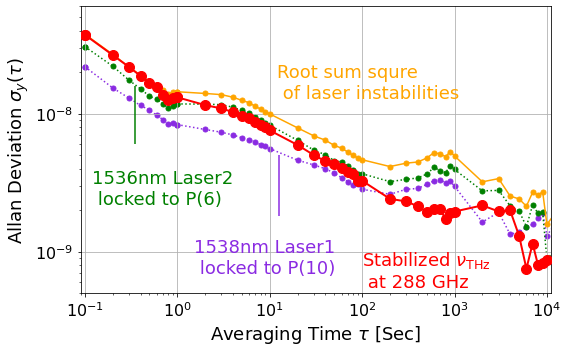

In [114]:
plt.figure(figsize=(8, 5.0))

# ログスケール表示
plt.xscale('log')
plt.yscale('log')

# plt.subplot(6, 2, 3)
plt.plot(thz288G_locked_01s_aln[0:10,0],thz288G_locked_01s_aln[0:10,1], 'o-', markersize=10, color='red',linewidth = 2.0, label='thz288G_locked_01s_aln', zorder=3)
plt.plot(thz288G_locked_1s_aln[:,0],thz288G_locked_1s_aln[:,1], 'o-', markersize=10, color='red', linewidth = 2.0, label='thz288G_locked_1s_aln', zorder=3)

plt.plot(P10_1538nm_locked_01s_aln[0:10,0], P10_1538nm_locked_01s_aln[0:10,1]*(194821.8/288), 'o:',  markersize=5, color='blueviolet', linewidth = 1.5, label='P10_1538nm_locked_01s_aln', zorder=1)
plt.plot(P10_1538nm_locked_1s_aln[:,0], P10_1538nm_locked_1s_aln[:,1]*(194821.8/288), 'o:',  markersize=5, color='blueviolet', linewidth = 1.5, label='P10_1538nm_locked_1s_aln', zorder=1)

plt.plot(P6_1536nm_locked_01s_aln[0:10,0], P6_1536nm_locked_01s_aln[0:10,1]*(195109.9/288), 'o:', markersize=5, color = "green", linewidth = 1.5, label='P6_1536nm_locked_01s_aln', zorder=1)
plt.plot(P6_1536nm_locked_1s_aln[:,0], P6_1536nm_locked_1s_aln[:,1]*(195109.9/288), 'o:', markersize=5, color = "green", linewidth = 1.5, label='P6_1536nm_locked_1s_aln', zorder=1)

plt.plot(no_correlation_case_summary_aln[:,0], no_correlation_case_summary_aln[:,1], 'o-', markersize=5, color='orange',linewidth = 1.5, label='no_correlation_case_summary_aln', zorder=2)

# plt.plot(thz288G_freerun_01s_aln[0:10,0],thz288G_freerun_01s_aln[0:10,1], 'o:',  markersize=5, color='blue', linewidth = 1.5, label='thz288G_freerun_01s_aln')
# plt.plot(thz288G_freerun_1s_aln[0:31,0],thz288G_freerun_1s_aln[0:31,1], 'o:',  markersize=5, color='blue', linewidth = 1.5, label='thz288G_freerun_1s_aln')

plt.grid()
plt.title('', fontsize=18)
# グラフのタイトル
plt.xlabel('Averaging Time $\\tau$ [Sec]', fontsize=18)
# X軸のラベル
# plt.xlabel('Time [sec]', fontsize=18)
# Y軸のラベル
plt.ylabel('Allan Deviation $\sigma_{y}(\\tau)$', fontsize=18)
#plt.legend()
# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)
# グラフ軸の範囲
plt.xlim([9e-2, 1.1e4])
plt.ylim([5e-10, 6e-8])
#igfont = {'family':'IPAGothic'}
#plt.text(0.157e9,-28,'RBW=500kHz',size=14, color='Black')
#plt.text(0.157e9,-32,'VBW=10kHz',size=14, color='Black')
#plt.text(0.21e9,-43,'Locked',size=14, color='Red')
#plt.text(0.205e9,-35,'Freerun',size=14, color='Blue')
#plt.text(0.185e9,-49,'Locked',size=14, color='Green')
#plt.text(0.185e9,-51,'(w/o max-hold)',size=14, color='Green')

#Axesに対してテキストを入れる
plt.text(100, 5.5e-10, 'Stabilized $\\nu_{\\rm THz}$ \n at 288 GHz', color='red', fontsize=18)

plt.text(0.12, 2.2e-9, '1536nm Laser2 \n locked to P(6)', color='green', fontsize=18)
plt.text(1.5, 7e-10, '1538nm Laser1 \n locked to P(10)', color='blueviolet', fontsize=18)

plt.text(12, 1.3e-8, 'Root sum squre \n of laser instabilities', color='orange', fontsize=18)

# plt.text(11, 1.4e-6, 'Freerun', color='blue', fontsize=18)

# 線をプロット
plt.vlines(0.35, 6.0e-9, 1.6e-8, colors='green', linestyle='solid', linewidth=1.5)
plt.vlines(12.5, 1.8e-9, 5.0e-9, colors='blueviolet', linestyle='solid', linewidth=1.5)

# グラフが重ならないように丁度良く調整
plt.tight_layout()

# save as png
plt.savefig('comparison_aln_summary2.png')

# save as eps
# plt.savefig('comparison_aln_summary2.eps')

## $f_{\rm beat}$ RF Spectrum of 0.3THz standard

### Load data

In [115]:
thz288G_linewidth_avg = np.loadtxt('/home/shina/FOFC/220630/r0630_2.txt', comments='#')
thz288G_linewidth_singleshot = np.loadtxt('/home/shina/FOFC/220630/r0630_4.txt', comments='#')

### Data plot

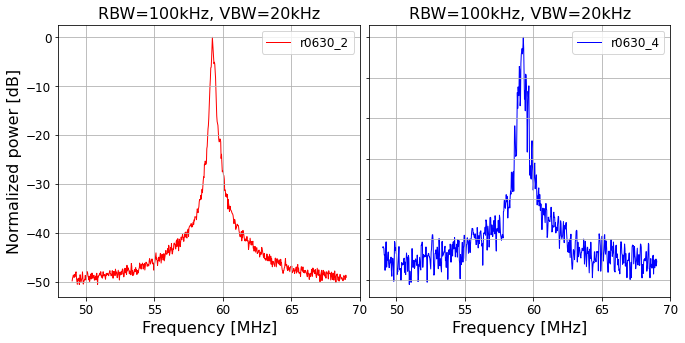

In [116]:
plt.figure(figsize=(10, 5.0))

# ---------------------------------------------------------------------------------------------------
plt.subplot(1, 2, 1)
plt.plot(thz288G_linewidth_avg[:,0]/(1e6),thz288G_linewidth_avg[:,1]-max(thz288G_linewidth_avg[:,1]), \
         'r', label='r0630_2', linewidth = 1.0, zorder=1)
#zorder=xは奥行z方向のプロットの順番で、プロットの重なりが問題になる場合に調整に使用する。
plt.grid()

# グラフのタイトル
plt.title("RBW=100kHz, VBW=20kHz", fontsize=16)
# X軸のラベル
plt.xlabel('Frequency [MHz]', fontsize=16)
# Y軸のラベル
plt.ylabel('Normalized power [dB]', fontsize=16)
# レジェンド表示
plt.legend(fontsize=12)

#x軸の範囲
# plt.xlim([177.5,182.5])
#y軸の範囲
# plt.ylim([-50,2.5])

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=12)
# ｘ軸の目盛りの数字を消す
# plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
# plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.02, hspace=0.01)

# ---------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(thz288G_linewidth_singleshot[:,0]/(1e6),thz288G_linewidth_singleshot[:,1]-max(thz288G_linewidth_singleshot[:,1]), \
         'b', label='r0630_4', linewidth = 1.0, zorder=1)
#zorder=xは奥行z方向のプロットの順番で、プロットの重なりが問題になる場合に調整に使用する。
plt.grid()

# グラフのタイトル
plt.title("RBW=100kHz, VBW=20kHz", fontsize=16)
# X軸のラベル
plt.xlabel('Frequency [MHz]', fontsize=16)
# Y軸のラベル
# plt.ylabel('Normalized power [dB]', fontsize=14)
# レジェンド表示
plt.legend(fontsize=12)

#x軸の範囲
# plt.xlim([177.5,182.5])
#y軸の範囲
# plt.ylim([-50,2.5])

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=12)
# ｘ軸の目盛りの数字を消す
# plt.xticks(color="None")
# ｙ軸の目盛りの数字を消す
plt.yticks(color="None")
# 余白を設定
plt.subplots_adjust(left=0.05, wspace=0.03, hspace=0.01)

# ---------------------------------------------------------------------------------------------------

# グラフが重ならないように丁度良く調整
# plt.tight_layout()

# Matplotlibで出力する図の端が切れてしまうときは bbox_inches='tight'を使う。
# plt.tight_layout()だと今回のようにGridSpecを利用しているときにはグラフ間隔がリセットされてしまうので注意が必要。
# save as png
# plt.savefig('thz288G_fbeat_rf_spectrum.png', bbox_inches='tight')
# save as eps
# plt.savefig('thz288G_fbeat_rf_spectrum.eps', bbox_inches='tight')

#plt.show()はいつも最後にしないと、プロットが出力されないなどの不具合が生じるので要注意
#plt.show() 

### Linewidth of 0.3THz srandard

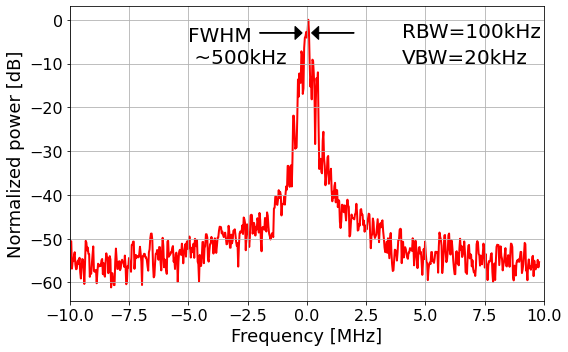

In [117]:
plt.figure(figsize=(8, 5.0))

# ログスケール表示
# plt.xscale('log')
# plt.yscale('log')

# ---------------------------------------------------------------------------------------------------
# plt.plot(thz288G_linewidth_avg[:,0]/(1e6) - 59.20,thz288G_linewidth_avg[:,1]-max(thz288G_linewidth_avg[:,1]), 'r', label='r0630_2', linewidth = 2.0, zorder=2)
plt.plot(thz288G_linewidth_singleshot[:,0]/(1e6) - 59.20,thz288G_linewidth_singleshot[:,1]-max(thz288G_linewidth_singleshot[:,1]), 'r', label='r0630_4', linewidth = 2.0, zorder=1)
plt.grid()

# グラフのタイトル
# plt.title('Inline Arm', fontsize=18)
# X軸のラベル
plt.xlabel('Frequency [MHz]', fontsize=18)
# Y軸のラベル
plt.ylabel('Normalized power [dB]', fontsize=18)
# レジェンド
# plt.legend(fontsize=16)

# グラフ目盛り数字のフォントサイズ
plt.tick_params(labelsize=16)

#x軸の範囲
plt.xlim([-10, 10])
#y軸の範囲
# plt.ylim([0,0.005])

# 矢印
plt.arrow(x=-2, y=-3, dx=1.8, dy=0, width=0.02, head_width=3.0, head_length=0.3, length_includes_head=True, color='k')
plt.arrow(x=2, y=-3, dx=-1.8, dy=0, width=0.02, head_width=3.0, head_length=0.3, length_includes_head=True, color='k')

#Axesに対してテキストを入れる
plt.text(4.0, -4, 'RBW=100kHz', color='black', fontsize=20)
plt.text(4.0, -10, 'VBW=20kHz', color='black', fontsize=20)
plt.text(-5.0, -10, 'FWHM \n ~500kHz', color='black', fontsize=20)
# ---------------------------------------------------------------------------------------------------

# グラフが重ならないように丁度良く調整
plt.tight_layout()
# Matplotlibで出力する図の端が切れてしまうときは bbox_inches='tight'を使う。
# plt.tight_layout()だと今回のようにGridSpecを利用しているときにはグラフ間隔がリセットされてしまうので注意が必要。
# save as png
plt.savefig('thz288G_linewidth.png', bbox_inches='tight')
# save as eps
# plt.savefig('thz288G_linewidth.eps', bbox_inches='tight')

#plt.show()はいつも最後にしないと、プロットが出力されないなどの不具合が生じるので要注意
plt.show() 
